In [10]:
#Ising model

# for every point in the grid:
#     energy = my spin * sum of all of the spins (+1 or -1) of neighboring points
#     if energy is improved by switching:
#         switch
#     else if we're particulalry unlucky
#         switch anyway

In [11]:
import numpy as np

def randaom_spin_field(N,M):
    return np.random.choice([-1,1],size=(N,M))

randaom_spin_field(10,10)

array([[ 1, -1, -1, -1,  1, -1,  1, -1, -1,  1],
       [ 1,  1,  1,  1,  1, -1, -1,  1,  1,  1],
       [ 1,  1, -1,  1, -1,  1, -1,  1,  1, -1],
       [-1,  1,  1, -1, -1,  1, -1,  1, -1, -1],
       [ 1,  1,  1,  1, -1,  1,  1,  1, -1,  1],
       [-1, -1,  1,  1,  1,  1, -1, -1, -1,  1],
       [-1, -1, -1,  1, -1,  1,  1,  1,  1,  1],
       [-1,  1,  1, -1, -1,  1, -1,  1,  1,  1],
       [-1, -1, -1, -1, -1,  1,  1,  1,  1, -1],
       [-1,  1,  1,  1, -1, -1,  1, -1, -1, -1]])

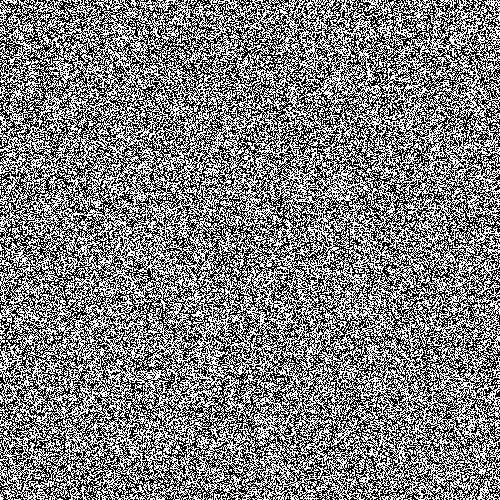

In [12]:
from PIL import Image

def display_spin_field(field):
    return Image.fromarray(np.uint8((field + 1)*0.5*255))

display_spin_field(randaom_spin_field(500,500))

In [13]:
# def ising_step(field, beta = 0.4):
#     N, M = field.shape
#     for n in range(N):
#         for m in range(M):
#             _ising_update(field, n, m , beta)
#     return field

# def _ising_update(field, n, m, beta):
#     total = 0
#     N, M = field.shape
#     for i in range(n-1,n+2):
#         for j in range(m-1,m+2):
#             if i == n and j == m:
#                 continue
#             total += field[i % N, j % M]
#     dE = 2 * field[n, m]* total
#     if dE <= 0:
#         field[n, m] *= -1
#     elif np.exp(-dE * beta) > np.random.rand():
#         field[n, m] *= -1

In [14]:
# display_spin_field(ising_step(randaom_spin_field(500,500)))

In [15]:
#setting offset
def ising_step(field, beta = 0.4):
    N, M = field.shape
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N ,2):
                for m in range(m_offset, M, 2):
                    _ising_update(field, n, m , beta)
    return field

def _ising_update(field, n, m, beta):
    total = 0
    N, M = field.shape
    for i in range(n-1,n+2):
        for j in range(m-1,m+2):
            if i == n and j == m:
                continue
            total += field[i % N, j % M]
    dE = 2 * field[n, m]* total
    if dE <= 0:
        field[n, m] *= -1
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1

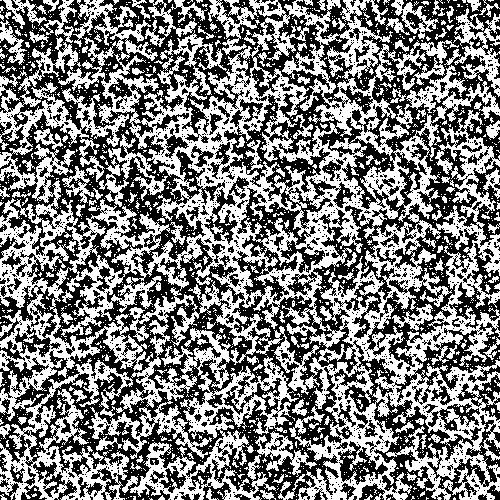

In [16]:
display_spin_field(ising_step(randaom_spin_field(500,500)))

In [17]:
from ipywidgets import interact

def display_ising_sequence(images):
    def _show(frame=(0, len(images)-1)):
        return display_spin_field(images[frame])
    return interact(_show)

In [18]:
images = [randaom_spin_field(200,200)]
for i in range(50):
    images.append(ising_step(images[-1].copy()))
display_ising_sequence(images)

interactive(children=(IntSlider(value=25, description='frame', max=50), Output()), _dom_classes=('widget-inter…

<function __main__.display_ising_sequence.<locals>._show(frame=(0, 50))>